In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Scarped Articles

In [2]:
import pandas as pd

# Load the articles CSV
articles_df = pd.read_csv('/content/drive/MyDrive/Datasets/Sentiment_Analysis/tsla_articles_2023.csv')

# Display the first few rows of the dataset
print(articles_df.head())

# Get basic information about the dataset
print("\nDataset Info:")
print(articles_df.info())

# Check for missing values
print("\nMissing Values:")
print(articles_df.isnull().sum())


        PublishedAt                                              Title  \
0  20231031T090000Z  Almost As Good As You : Elon Musk Reply To Mot...   
1  20231003T193000Z  Grimes Sues Ex Elon Musk Over Parental Rights ...   
2  20231023T210000Z  Elon Musk offers $1B to Wikipedia if it change...   
3  20231107T011500Z  Elon Musk X / Twitter Starts Selling Account H...   
4  20231002T183000Z  Tesla 3Q sales rise 27 % but fall short of exp...   

                                                 URL  \
0  https://www.ndtv.com/offbeat/almost-as-good-as...   
1  https://www.usmagazine.com/celebrity-news/news...   
2  https://www.myrtlebeachonline.com/news/politic...   
3  https://www.breitbart.com:443/economy/2023/11/...   
4  https://www.local10.com/business/2023/10/02/te...   

                                             Content  
0  Elon Musk and Maye Musk. Halloween is upon us,...  
1   By clicking Sign In, you agree to our Terms a...  
2                                                NaN 

# Data Preprocessing


*   Removed stop words
*   Removed white spaces
*   Converted PublishedAt to date-time




In [3]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords (only the first time)
nltk.download('stopwords')

# Define stopwords list
stop_words = set(stopwords.words('english'))


articles_df['PublishedAt'] = pd.to_datetime(articles_df['PublishedAt'])
articles_df['PublishedAt'] = pd.to_datetime(articles_df['PublishedAt']).dt.date
articles_df = articles_df.sort_values(by='PublishedAt')

# Impute missing Content using forward fill (ffill)
articles_df['Content'] = articles_df['Content'].ffill()

def clean_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove special characters, punctuation, and digits
    text = re.sub(r'[^a-z\s]', '', text)

    # Remove extra whitespace and tabs
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)

    return text

# 3. Apply the cleaning function to the 'Content' column
articles_df['CleanedContent'] = articles_df['Content'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Data Display After Cleaning

In [4]:
articles_df

,PublishedAt,Title,URL,Content,CleanedContent
202,2023-10-02,Elon Musk Justin Trudeau Crushing Free Speech ...,https://www.ndtv.com/world-news/elon-musk-just...,SpaceX founder and CEO Elon Musk slammed the J...,spacex founder ceo elon musk slammed justin tr...
161,2023-10-02,Tesla 3Q sales rise 27 % but fall short of ana...,https://www.marketscreener.com/quote/stock/TES...,OK XID: 21187552346 Varnish cache server,ok xid varnish cache server
168,2023-10-02,Musk posted a meme about Zelensky and a reques...,https://eng.obozrevatel.com/section-politics/n...,OK XID: 21187552346 Varnish cache server,ok xid varnish cache server
65,2023-10-02,Tesla Q3 2023 Production and Delivery Numbers ...,https://www.autoevolution.com/news/tesla-q3-20...,OK XID: 21187552346 Varnish cache server,ok xid varnish cache server
227,2023-10-02,Tesla 3Q sales rise 27 % but fall short of exp...,https://www.ksat.com/business/2023/10/02/tesla...,"Associated Press Published: October 2, 2023 at...",associated press published october updated oct...
...,...,...,...,...,...
50,2023-12-29,Elon Musk says Tesla in race against time to w...,https://www.thenews.com.pk/latest/1142856-elon...,Tech billionaire Elon Musk disclosed that elec...,tech billionaire elon musk disclosed electric ...
180,2023-12-29,Combined net worth of 500 richest surges by $1...,https://www.business-standard.com/world-news/c...,Tech billionaire Elon Musk disclosed that elec...,tech billionaire elon musk disclosed electric ...
208,2023-12-29,Musk returns as world richest man ; net worth ...,https://www.ibtimes.co.in/musk-returns-worlds-...,Tesla and SpaceX CEO Elon Musk has returned as...,tesla spacex ceo elon musk returned worlds ric...
221,2023-12-30,Elon Musk Advocates for Improved NFT Implement...,https://www.economywatch.com/news/elon-musk-ad...,Home » News » Elon Musk Advocates for Improved...,home news elon musk advocates improved nft imp...


# Articles per Date Distribution

In [5]:

# Check the distribution of articles by date
print("\nArticles per Date:")
print(articles_df['PublishedAt'].value_counts().head(10))  # Top 10 dates with most articles

# Check the unique number of dates and articles
print(f"\nTotal unique dates: {articles_df['PublishedAt'].nunique()}")
print(f"Total number of articles: {articles_df.shape[0]}")



Articles per Date:
PublishedAt
2023-10-12    13
2023-10-03    12
2023-10-02    10
2023-12-06    10
2023-11-10    10
2023-10-05     9
2023-10-06     9
2023-10-11     9
2023-10-23     8
2023-10-04     8
Name: count, dtype: int64

Total unique dates: 61
Total number of articles: 277


# Article Length Statistics


Article Length Statistics:
count      277.000000
mean      3661.422383
std       3097.266844
min         40.000000
25%       2087.000000
50%       2707.000000
75%       4107.000000
max      29337.000000
Name: Article_Length, dtype: float64


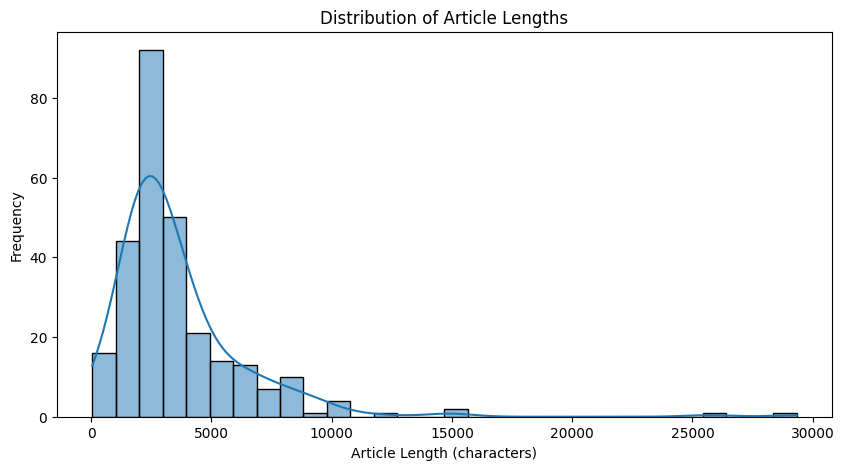

In [6]:
# Create a new column with the length of each article
articles_df['Article_Length'] = articles_df['Content'].apply(lambda x: len(str(x)))

# Summary statistics of article lengths
print("\nArticle Length Statistics:")
print(articles_df['Article_Length'].describe())

# Plot the distribution of article lengths
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(articles_df['Article_Length'], bins=30, kde=True)
plt.title('Distribution of Article Lengths')
plt.xlabel('Article Length (characters)')
plt.ylabel('Frequency')
plt.show()


Right-Skewed Distribution:

- Most articles are relatively short, with the highest frequency of articles having a length between 0 to 5000 characters.
- There are only a few articles with very large lengths (greater than 10,000 characters).

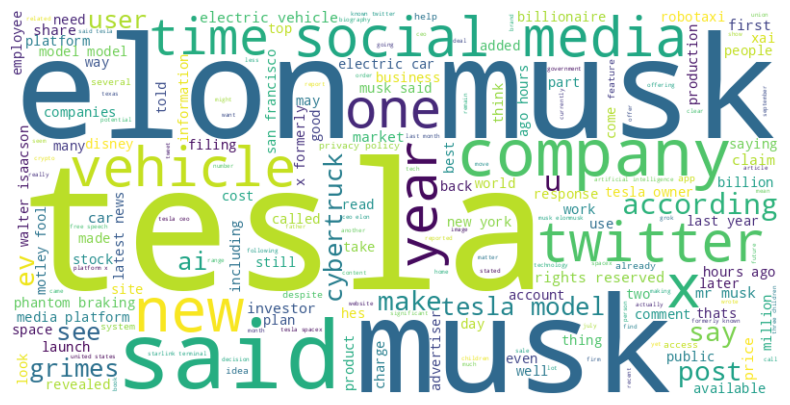

In [7]:
from wordcloud import WordCloud

# Combine all articles into a single string
all_text = ' '.join(articles_df['CleanedContent'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


**"Tesla," "Musk," and "Elon**

- The largest words, such as "Tesla," "Musk," and "Elon," highlight the central focus of these articles—Tesla as a company and Elon Musk as a key figure.
- This suggests that much of the discussion revolves around the actions or decisions of Elon Musk, aligning with his influence on Tesla’s operations and market perception.

**"Twitter," "vehicle," "price," "stock," "new," "company," and "car"**

- Words like indicate discussions related to:
Tesla’s vehicles and new products or models.

- The company’s stock price and market activity.

- Elon Musk’s involvement with Twitter, which has been in the spotlight, impacting both Tesla's market sentiment and his public image.

- Mentions of "investor," "social media," "stock," and "post" highlight the role of public opinion and investor sentiment, possibly emphasizing the influence of Musk’s social media activity on Tesla's stock price.


Sentiment Score Statistics:
count    277.000000
mean       0.099757
std        0.103079
min       -0.198264
25%        0.034466
50%        0.096717
75%        0.154154
max        0.500000
Name: Sentiment_Score, dtype: float64


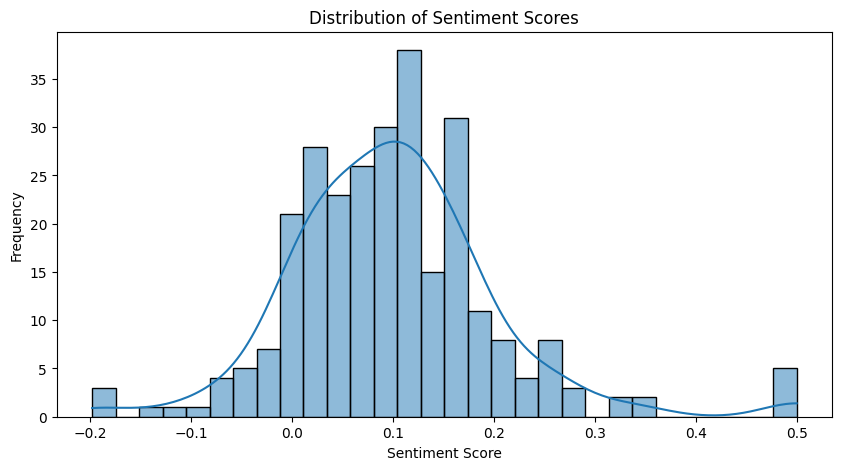

In [8]:
from textblob import TextBlob

# Calculate sentiment polarity for each article
articles_df['Sentiment_Score'] = articles_df['CleanedContent'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Summary statistics of sentiment scores
print("\nSentiment Score Statistics:")
print(articles_df['Sentiment_Score'].describe())

# Plot the distribution of sentiment scores
plt.figure(figsize=(10, 5))
sns.histplot(articles_df['Sentiment_Score'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


# Loading Stock Prices of Tesla from Yahoo Finance

In [34]:
prices_df = pd.read_csv('/content/drive/MyDrive/Datasets/Sentiment_Analysis/tesla_2023_prices.csv')
prices_df['Date'] = pd.to_datetime(prices_df['Date'])
prices_df['Date'] = pd.to_datetime(prices_df['Date']).dt.date
prices_df = prices_df.sort_values(by='Date')

# Data Visualization

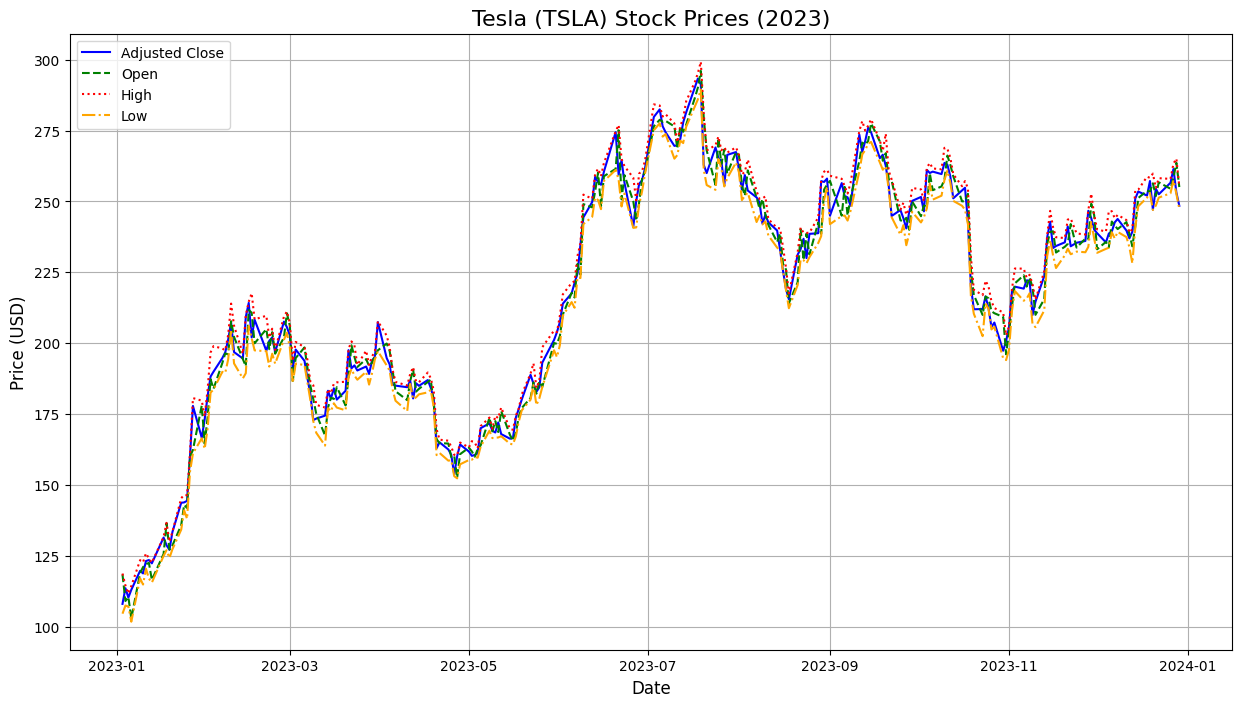

In [35]:

# Set 'Date' as the DataFrame index (useful for plotting time-series data)
prices_df.set_index('Date', inplace=True)

# Step 3: Plot stock prices using Matplotlib and Seaborn
plt.figure(figsize=(15, 8))

# Plot Adjusted Close Price
sns.lineplot(data=prices_df, x=prices_df.index, y='adjusted_close_price', label='Adjusted Close', color='blue')

# Plot Open, High, Low Prices
sns.lineplot(data=prices_df, x=prices_df.index, y='open_price', label='Open', color='green', linestyle='dashed')
sns.lineplot(data=prices_df, x=prices_df.index, y='high_price', label='High', color='red', linestyle='dotted')
sns.lineplot(data=prices_df, x=prices_df.index, y='low_price', label='Low', color='orange', linestyle='dashdot')

# Step 4: Customize the plot
plt.title('Tesla (TSLA) Stock Prices (2023)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)

# Step 5: Show the plot
plt.show()

In [11]:
!pip install nltk
!python3 -m nltk.downloader vader_lexicon

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# Sentiment Analysis

*   Calculated title and content sentiment
*   Averaged them to get overall sentiment
*   Grouped by Date to get overall sentiment of a day



In [36]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER
sia = SentimentIntensityAnalyzer()


df = pd.DataFrame(articles_df)

# Define a function to calculate sentiment score using VADER
def get_sentiment_vader(text):
    # Convert the input to string if it's not already
    if not isinstance(text, str):
        text = str(text)
    return sia.polarity_scores(text)['compound']

# Add sentiment columns for Title and Content
df['TitleSentiment'] = df['Title'].apply(get_sentiment_vader)
df['ContentSentiment'] = df['CleanedContent'].apply(get_sentiment_vader)

print(df)

    PublishedAt                                              Title  \
202  2023-10-02  Elon Musk Justin Trudeau Crushing Free Speech ...   
161  2023-10-02  Tesla 3Q sales rise 27 % but fall short of ana...   
168  2023-10-02  Musk posted a meme about Zelensky and a reques...   
65   2023-10-02  Tesla Q3 2023 Production and Delivery Numbers ...   
227  2023-10-02  Tesla 3Q sales rise 27 % but fall short of exp...   
..          ...                                                ...   
50   2023-12-29  Elon Musk says Tesla in race against time to w...   
180  2023-12-29  Combined net worth of 500 richest surges by $1...   
208  2023-12-29  Musk returns as world richest man ; net worth ...   
221  2023-12-30  Elon Musk Advocates for Improved NFT Implement...   
211  2023-12-30  Elon Musk April Fool joke backfired and cost h...   

                                                   URL  \
202  https://www.ndtv.com/world-news/elon-musk-just...   
161  https://www.marketscreener.com/quote/s

# Daily sentiment score

In [37]:

# Calculate the overall sentiment as the average of Title and Content sentiment
df['OverallSentiment'] = (df['TitleSentiment'] + df['ContentSentiment']) / 2

# Step 3: Group by 'PublishedAt' to calculate the average sentiment for each day
daily_sentiment = df.groupby('PublishedAt')['OverallSentiment'].mean().reset_index()
print(daily_sentiment)

   PublishedAt  OverallSentiment
0   2023-10-02          0.164335
1   2023-10-03          0.150175
2   2023-10-04          0.137088
3   2023-10-05          0.283156
4   2023-10-06          0.232122
..         ...               ...
56  2023-12-26          0.439700
57  2023-12-27          0.212800
58  2023-12-28          0.367150
59  2023-12-29          0.299575
60  2023-12-30          0.574150

[61 rows x 2 columns]


In [38]:
date_range = pd.date_range(start=daily_sentiment['PublishedAt'].min(),
                           end=daily_sentiment['PublishedAt'].max(), freq='D')

# Step 2: Reindex `sentiments_df` to this full date range
daily_sentiment = daily_sentiment.set_index('PublishedAt').reindex(date_range)

# Step 3: Rename the index to 'PublishedAt' and reset it as a column
daily_sentiment.index.name = 'PublishedAt'
daily_sentiment.reset_index(inplace=True)

# Step 4: Forward-fill missing 'OverallSentiment' values
daily_sentiment['OverallSentiment'].fillna(method='ffill', inplace=True)

<ipython-input-38-ea235a0c3c53>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  daily_sentiment['OverallSentiment'].fillna(method='ffill', inplace=True)
<ipython-input-38-ea235a0c3c53>:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_sentiment['OverallSentiment'].fillna(method='ffill', inplace=True)


In [39]:
daily_sentiment['PublishedAt'] = pd.to_datetime(daily_sentiment['PublishedAt'])
daily_sentiment['PublishedAt'] = pd.to_datetime(daily_sentiment['PublishedAt']).dt.date
daily_sentiment = daily_sentiment.sort_values(by='PublishedAt')
daily_sentiment

,PublishedAt,OverallSentiment
0,2023-10-02,0.164335
1,2023-10-03,0.150175
2,2023-10-04,0.137088
3,2023-10-05,0.283156
4,2023-10-06,0.232122
...,...,...
85,2023-12-26,0.439700
86,2023-12-27,0.212800
87,2023-12-28,0.367150
88,2023-12-29,0.299575


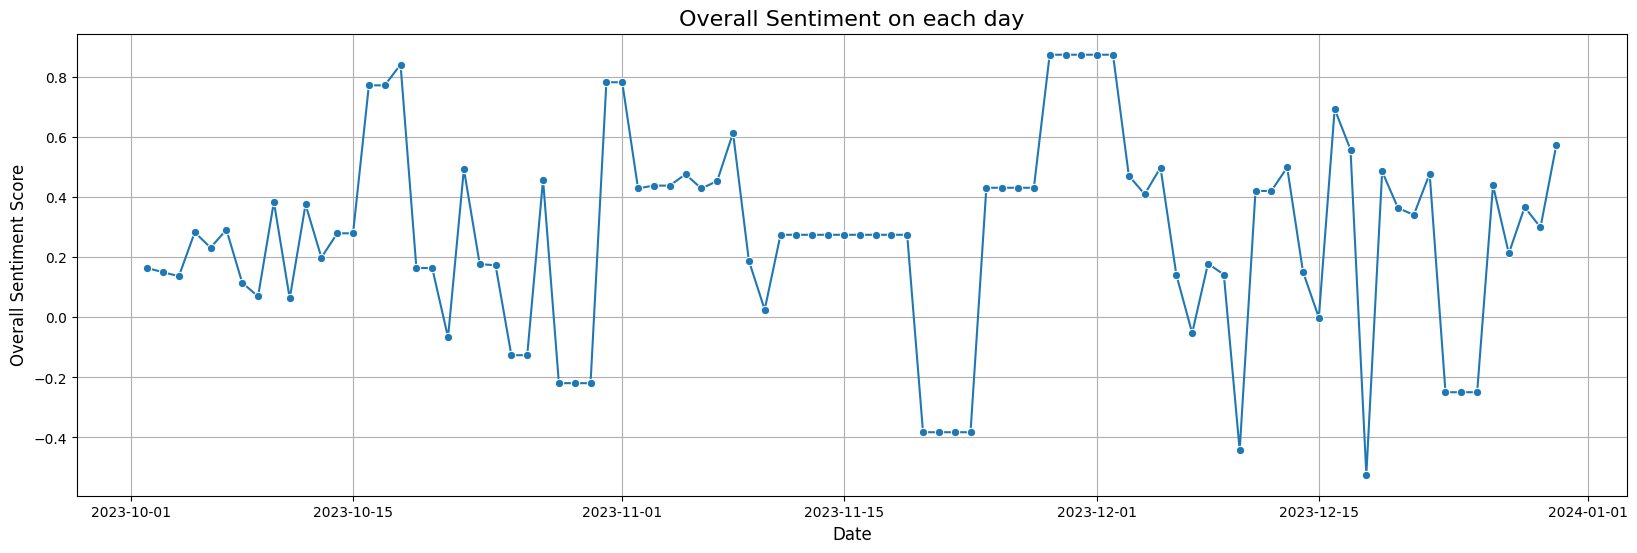

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(20, 6))
sns.lineplot(data=daily_sentiment, x='PublishedAt', y='OverallSentiment', marker='o')

# Adding labels and title
plt.title('Overall Sentiment on each day', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Overall Sentiment Score', fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

In [41]:
prices_and_sentiments = prices_df.merge(daily_sentiment, left_on='Date', right_on='PublishedAt', how='left')

In [42]:
filtered_prices_and_sentiments = prices_and_sentiments[prices_and_sentiments['PublishedAt'].notnull()]
filtered_prices_and_sentiments

,Unnamed: 0,adjusted_close_price,close_price,high_price,low_price,open_price,volume,PublishedAt,OverallSentiment
187,187,251.600006,251.600006,254.279999,242.619995,244.809998,123810400,2023-10-02,0.164335
188,188,246.529999,246.529999,250.020004,244.449997,248.610001,101985300,2023-10-03,0.150175
189,189,261.160004,261.160004,261.859985,247.600006,248.139999,129721600,2023-10-04,0.137088
190,190,260.049988,260.049988,263.600006,256.250000,260.000000,119159200,2023-10-05,0.283156
191,191,260.529999,260.529999,261.649994,250.649994,253.979996,117947000,2023-10-06,0.232122
...,...,...,...,...,...,...,...,...,...
245,245,252.539993,252.539993,258.220001,251.369995,256.760010,93249800,2023-12-22,0.478587
246,246,256.609985,256.609985,257.970001,252.910004,254.490005,86892400,2023-12-26,0.439700
247,247,261.440002,261.440002,263.339996,257.519989,258.350006,106494400,2023-12-27,0.212800
248,248,253.179993,253.179993,265.130005,252.710007,263.660004,113619900,2023-12-28,0.367150


In [43]:
filtered_prices_and_sentiments.drop(columns=['Unnamed: 0', 'high_price',	'low_price' ], inplace=True)

<ipython-input-43-2e9ecdbbce7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_prices_and_sentiments.drop(columns=['Unnamed: 0', 'high_price',	'low_price' ], inplace=True)


In [44]:
filtered_prices_and_sentiments.reset_index(inplace=True)

In [45]:
filtered_prices_and_sentiments['pct_change'] = ((filtered_prices_and_sentiments['close_price']-filtered_prices_and_sentiments['open_price'])/filtered_prices_and_sentiments['open_price']) * 100

<ipython-input-45-25a5c270a554>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_prices_and_sentiments['pct_change'] = ((filtered_prices_and_sentiments['close_price']-filtered_prices_and_sentiments['open_price'])/filtered_prices_and_sentiments['open_price']) * 100


In [46]:
filtered_prices_and_sentiments

,index,adjusted_close_price,close_price,open_price,volume,PublishedAt,OverallSentiment,pct_change
0,187,251.600006,251.600006,244.809998,123810400,2023-10-02,0.164335,2.773583
1,188,246.529999,246.529999,248.610001,101985300,2023-10-03,0.150175,-0.836653
2,189,261.160004,261.160004,248.139999,129721600,2023-10-04,0.137088,5.247040
3,190,260.049988,260.049988,260.000000,119159200,2023-10-05,0.283156,0.019226
4,191,260.529999,260.529999,253.979996,117947000,2023-10-06,0.232122,2.578944
...,...,...,...,...,...,...,...,...
58,245,252.539993,252.539993,256.760010,93249800,2023-12-22,0.478587,-1.643565
59,246,256.609985,256.609985,254.490005,86892400,2023-12-26,0.439700,0.833031
60,247,261.440002,261.440002,258.350006,106494400,2023-12-27,0.212800,1.196050
61,248,253.179993,253.179993,263.660004,113619900,2023-12-28,0.367150,-3.974820


In [47]:
filtered_prices_and_sentiments.to_csv('/content/drive/MyDrive/Datasets/Sentiment_Analysis/filtered_prices_and_sentiments.csv')

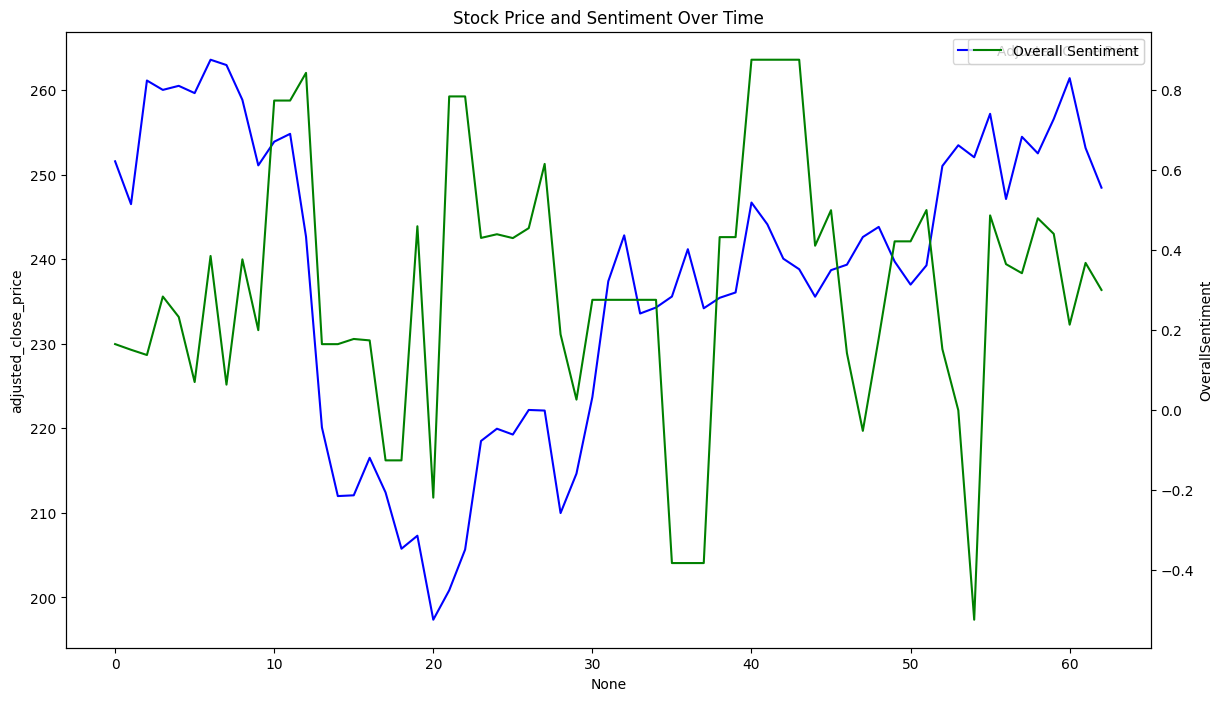

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot sentiment and adjusted close price over time
plt.figure(figsize=(14, 8))

# Plot adjusted_close_price
sns.lineplot(data=filtered_prices_and_sentiments, x=filtered_prices_and_sentiments.index, y='adjusted_close_price', color='blue', label='Adjusted Close Price')

# Plot OverallSentiment on a secondary y-axis for comparison
ax2 = plt.gca().twinx()
sns.lineplot(data=filtered_prices_and_sentiments, x=filtered_prices_and_sentiments.index, y='OverallSentiment', color='green', label='Overall Sentiment', ax=ax2)

plt.title("Stock Price and Sentiment Over Time")
plt.show()


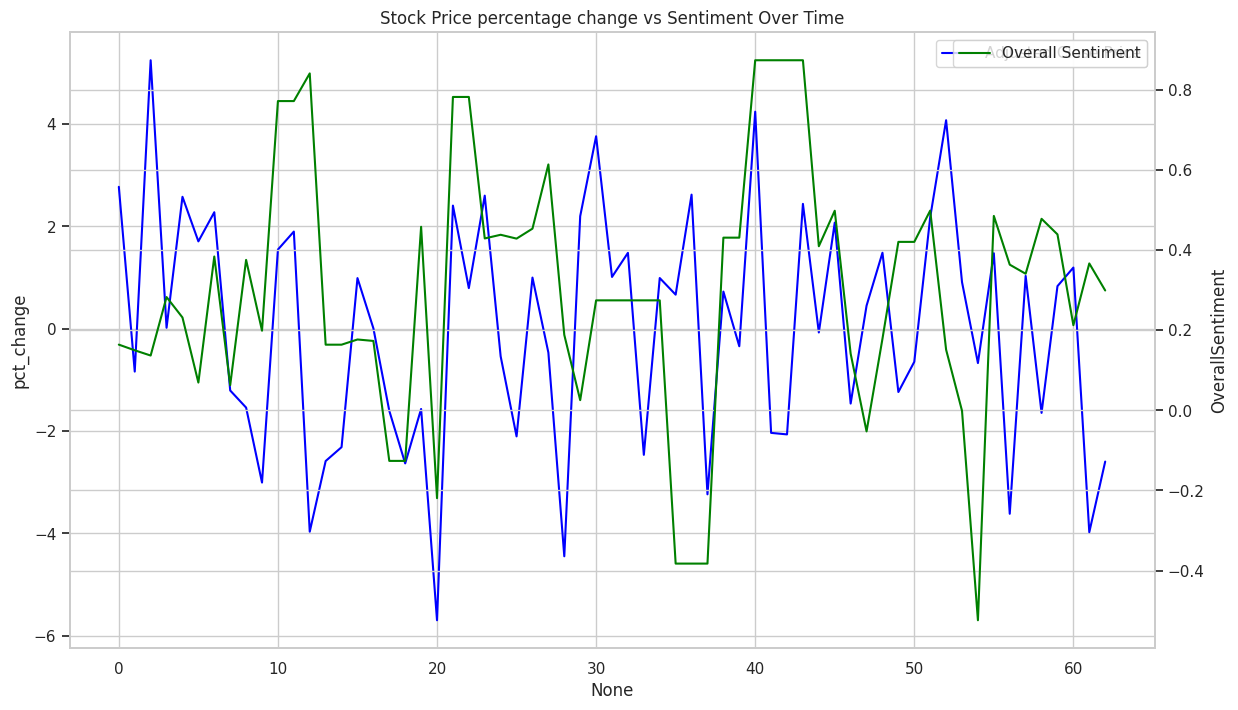

In [62]:

# Plot sentiment and adjusted close price over time
plt.figure(figsize=(14, 8))

# Plot adjusted_close_price
sns.lineplot(data=filtered_prices_and_sentiments, x=filtered_prices_and_sentiments.index, y='pct_change', color='blue', label='Adjusted Close Price')

# Plot OverallSentiment on a secondary y-axis for comparison
ax2 = plt.gca().twinx()
sns.lineplot(data=filtered_prices_and_sentiments, x=filtered_prices_and_sentiments.index, y='OverallSentiment', color='green', label='Overall Sentiment', ax=ax2)

plt.title("Stock Price percentage change vs Sentiment Over Time")
plt.show()

In [50]:
# filtered_prices_and_sentiments.reset_index(inplace=True)
filtered_prices_and_sentiments

,index,adjusted_close_price,close_price,open_price,volume,PublishedAt,OverallSentiment,pct_change
0,187,251.600006,251.600006,244.809998,123810400,2023-10-02,0.164335,2.773583
1,188,246.529999,246.529999,248.610001,101985300,2023-10-03,0.150175,-0.836653
2,189,261.160004,261.160004,248.139999,129721600,2023-10-04,0.137088,5.247040
3,190,260.049988,260.049988,260.000000,119159200,2023-10-05,0.283156,0.019226
4,191,260.529999,260.529999,253.979996,117947000,2023-10-06,0.232122,2.578944
...,...,...,...,...,...,...,...,...
58,245,252.539993,252.539993,256.760010,93249800,2023-12-22,0.478587,-1.643565
59,246,256.609985,256.609985,254.490005,86892400,2023-12-26,0.439700,0.833031
60,247,261.440002,261.440002,258.350006,106494400,2023-12-27,0.212800,1.196050
61,248,253.179993,253.179993,263.660004,113619900,2023-12-28,0.367150,-3.974820


# Loading Preprocessed data - prices_and_sentiments.csv

In [52]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Sentiment_Analysis/filtered_prices_and_sentiments.csv')

# Convert Date to datetime and set it as index
data['PublishedAt'] = pd.to_datetime(data['PublishedAt'])
data.set_index('PublishedAt', inplace=True)

# Split the data
train_data = data[:'2023-11-30']
test_data = data['2023-12-01':]

# Prepare features for the AR model
features = ['adjusted_close_price', 'OverallSentiment']

# AutoRegressive Model for Stock Price Prediction

The autoregressive (AR) model for stock price prediction is a time series forecasting technique that uses past values of the stock price to predict future values.

The AR model was created using the AutoReg class from the statsmodels library.
A lag of 5 was used, meaning the model considers the previous 5 days' prices to make predictions.

Key characteristics of the AR model:
- It assumes that future stock prices are linearly dependent on past prices.
- It can capture trends and patterns in the time series data.
- The model's performance depends on choosing an appropriate lag value.
- It's relatively simple and can serve as a baseline for comparison with more complex models.



In [63]:

import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Create and train the AR model
model = AutoReg(train_data['adjusted_close_price'], lags=5, exog=train_data['OverallSentiment'])
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test_data), exog=test_data['OverallSentiment'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the po

In [55]:
# Calculate error metrics
mse = mean_squared_error(test_data['adjusted_close_price'], predictions)
mae = mean_absolute_error(test_data['adjusted_close_price'], predictions)

print(f"Autoregressive Model - Mean Squared Error: {mse}")
print(f"Autoregressive Model - Mean Absolute Error: {mae}")

Autoregressive Model - Mean Squared Error: 466.4472760588591
Autoregressive Model - Mean Absolute Error: 18.266595262609812


# Comparison of Approaches:
1. Autoregressive Model
2. Linear Regression (Predicting Prices)
3. Predicting Percentage Change
4. Predicting Direction

In [56]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

# Load and prepare the data
file_path = '/content/drive/MyDrive/Datasets/Sentiment_Analysis/filtered_prices_and_sentiments.csv'
data = pd.read_csv(file_path)
data['PublishedAt'] = pd.to_datetime(data['PublishedAt'])
data.set_index('PublishedAt', inplace=True)

# Split the data
train_data = data[:'2023-11-30'].copy()
test_data = data['2023-12-01':].copy()

# Approach 1: Linear Regression (Predicting Prices)
X_train = train_data[['OverallSentiment', 'pct_change']]
y_train = train_data['adjusted_close_price']
X_test = test_data[['OverallSentiment', 'pct_change']]
y_test = test_data['adjusted_close_price']

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Approach 2: Predicting Percentage Change
pct_model = LinearRegression()
pct_model.fit(train_data[['OverallSentiment']], train_data['pct_change'])
pct_change_pred = pct_model.predict(test_data[['OverallSentiment']])

last_train_price = train_data['adjusted_close_price'].iloc[-1]
pct_pred_prices = [last_train_price]
for change in pct_change_pred:
    pct_pred_prices.append(pct_pred_prices[-1] * (1 + change/100))
pct_pred_prices = pct_pred_prices[1:]

# Approach 3: Predicting Direction
train_data.loc[:, 'direction'] = (train_data['pct_change'] > 0).astype(int)
test_data.loc[:, 'direction'] = (test_data['pct_change'] > 0).astype(int)

dir_model = LogisticRegression()
dir_model.fit(train_data[['OverallSentiment']], train_data['direction'])
dir_pred = dir_model.predict(test_data[['OverallSentiment']])

# Approach 4: Autoregressive Model
ar_model = AutoReg(train_data['adjusted_close_price'], lags=5, exog=train_data['OverallSentiment'])
ar_model_fit = ar_model.fit()
ar_pred = ar_model_fit.forecast(steps=len(test_data), exog=test_data['OverallSentiment'])

# Create a comparison dataframe
comparison_df = pd.DataFrame({
    'Actual': test_data['adjusted_close_price'],
    'AR_Predicted': ar_pred.values,  # Convert ar_pred to numpy array
    'LR_Predicted': lr_pred,
    'Pct_Change_Predicted': pct_pred_prices,
    'Direction_Predicted': dir_pred
}, index=test_data.index)

# Calculate error metrics for each approach
ar_mse = mean_squared_error(comparison_df['Actual'], comparison_df['AR_Predicted'])
ar_mae = mean_absolute_error(comparison_df['Actual'], comparison_df['AR_Predicted'])

lr_mse = mean_squared_error(comparison_df['Actual'], comparison_df['LR_Predicted'])
lr_mae = mean_absolute_error(comparison_df['Actual'], comparison_df['LR_Predicted'])

pct_mse = mean_squared_error(comparison_df['Actual'], comparison_df['Pct_Change_Predicted'])
pct_mae = mean_absolute_error(comparison_df['Actual'], comparison_df['Pct_Change_Predicted'])

direction_accuracy = accuracy_score(test_data['direction'], dir_pred)

print("Comparison of Approaches:")
print(f"1. Autoregressive Model - MSE: {ar_mse:.2f}, MAE: {ar_mae:.2f}")
print(f"2. Linear Regression (Predicting Prices) - MSE: {lr_mse:.2f}, MAE: {lr_mae:.2f}")
print(f"3. Predicting Percentage Change - MSE: {pct_mse:.2f}, MAE: {pct_mae:.2f}")
print(f"4. Predicting Direction - Accuracy: {direction_accuracy:.2%}")

Comparison of Approaches:
1. Autoregressive Model - MSE: 466.45, MAE: 18.27
2. Linear Regression (Predicting Prices) - MSE: 275.47, MAE: 13.85
3. Predicting Percentage Change - MSE: 129.67, MAE: 9.31
4. Predicting Direction - Accuracy: 55.00%


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the po

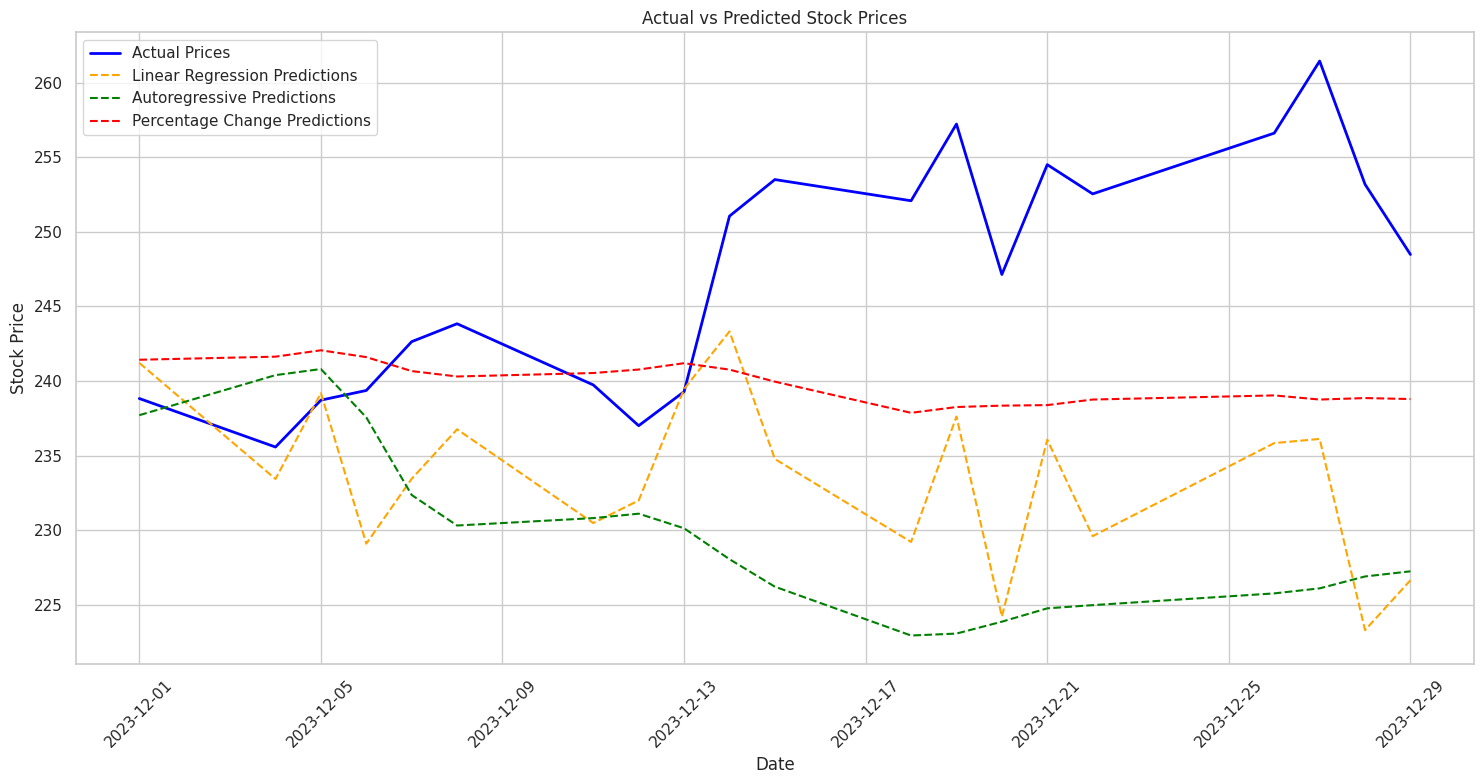

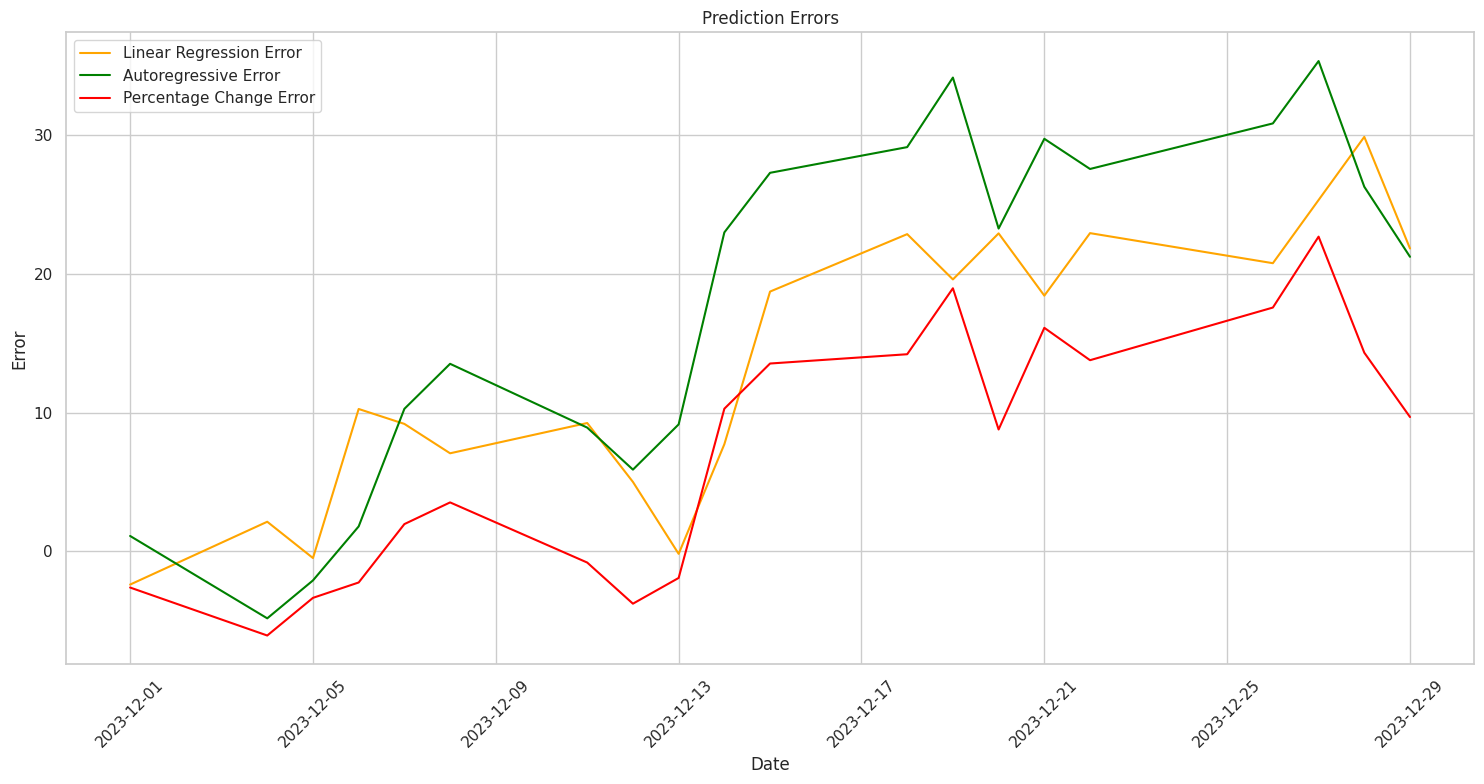

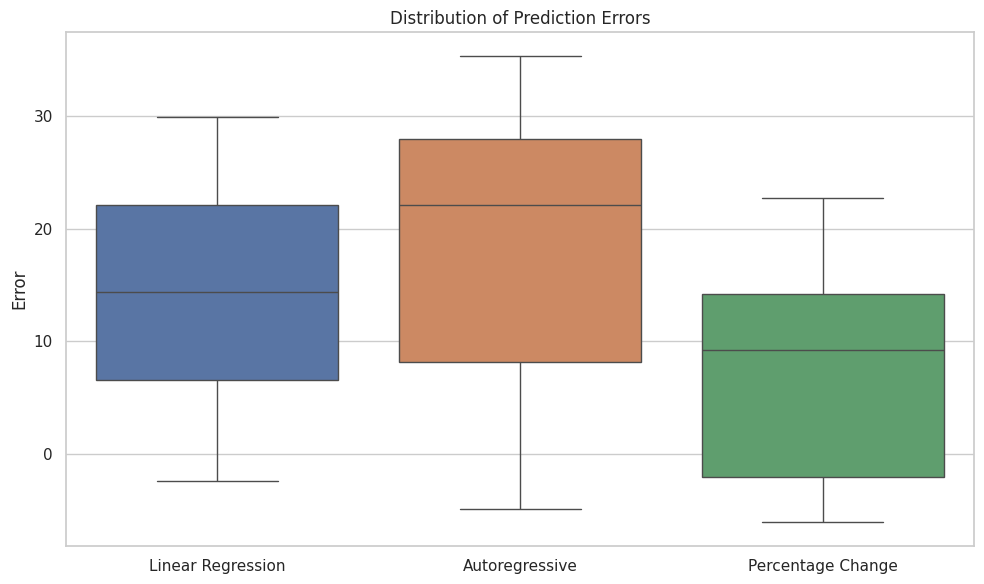

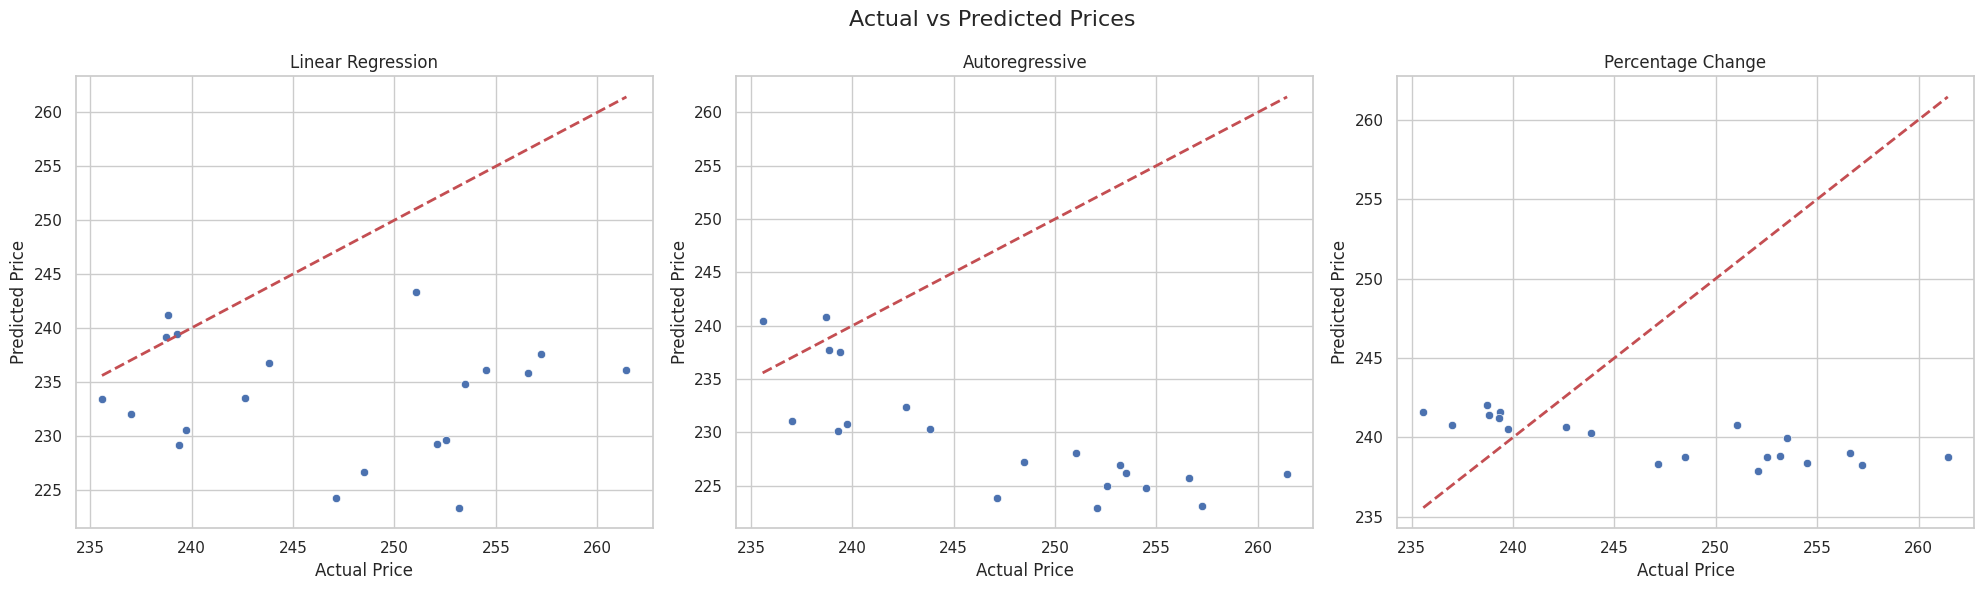

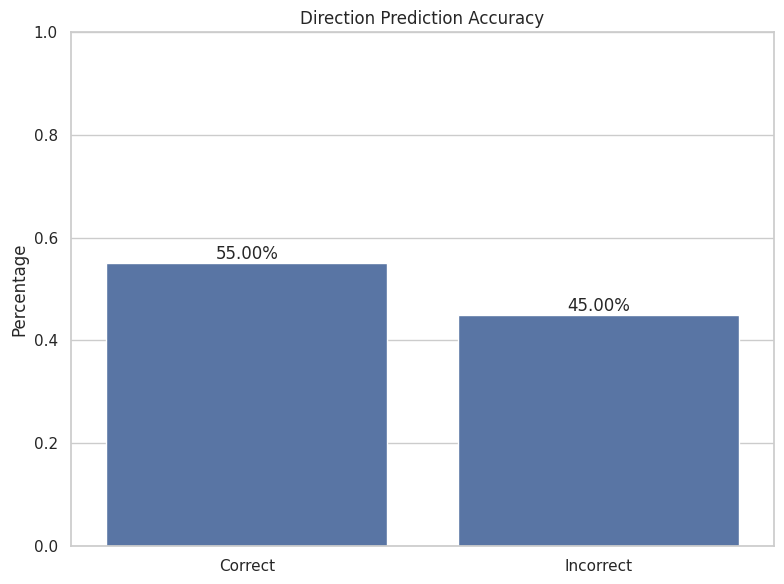

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

# Prepare data for visualization
comparison_df['Date'] = comparison_df.index

# 1. Plotting actual vs predicted prices
plt.figure(figsize=(15, 8))
plt.plot(comparison_df['Date'], comparison_df['Actual'], label='Actual Prices', color='blue', linewidth=2)
plt.plot(comparison_df['Date'], comparison_df['LR_Predicted'], label='Linear Regression Predictions', color='orange', linestyle='--')
plt.plot(comparison_df['Date'], comparison_df['AR_Predicted'], label='Autoregressive Predictions', color='green', linestyle='--')
plt.plot(comparison_df['Date'], comparison_df['Pct_Change_Predicted'], label='Percentage Change Predictions', color='red', linestyle='--')

plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Plotting prediction errors
plt.figure(figsize=(15, 8))
plt.plot(comparison_df['Date'], comparison_df['Actual'] - comparison_df['LR_Predicted'], label='Linear Regression Error', color='orange')
plt.plot(comparison_df['Date'], comparison_df['Actual'] - comparison_df['AR_Predicted'], label='Autoregressive Error', color='green')
plt.plot(comparison_df['Date'], comparison_df['Actual'] - comparison_df['Pct_Change_Predicted'], label='Percentage Change Error', color='red')

plt.title('Prediction Errors')
plt.xlabel('Date')
plt.ylabel('Error')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Boxplot of prediction errors
error_df = pd.DataFrame({
    'Linear Regression': comparison_df['Actual'] - comparison_df['LR_Predicted'],
    'Autoregressive': comparison_df['Actual'] - comparison_df['AR_Predicted'],
    'Percentage Change': comparison_df['Actual'] - comparison_df['Pct_Change_Predicted']
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=error_df)
plt.title('Distribution of Prediction Errors')
plt.ylabel('Error')
plt.tight_layout()
plt.show()

# 4. Scatter plot of actual vs predicted prices
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Actual vs Predicted Prices', fontsize=16)

sns.scatterplot(x='Actual', y='LR_Predicted', data=comparison_df, ax=axes[0])
axes[0].set_title('Linear Regression')
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')

sns.scatterplot(x='Actual', y='AR_Predicted', data=comparison_df, ax=axes[1])
axes[1].set_title('Autoregressive')
axes[1].set_xlabel('Actual Price')
axes[1].set_ylabel('Predicted Price')

sns.scatterplot(x='Actual', y='Pct_Change_Predicted', data=comparison_df, ax=axes[2])
axes[2].set_title('Percentage Change')
axes[2].set_xlabel('Actual Price')
axes[2].set_ylabel('Predicted Price')

for ax in axes:
    ax.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()],
            [comparison_df['Actual'].min(), comparison_df['Actual'].max()],
            'r--', lw=2)

plt.tight_layout()
plt.show()

# 5. Direction prediction accuracy
plt.figure(figsize=(8, 6))
sns.barplot(x=['Correct', 'Incorrect'],
            y=[direction_accuracy, 1-direction_accuracy])
plt.title('Direction Prediction Accuracy')
plt.ylabel('Percentage')
plt.ylim(0, 1)
for i, v in enumerate([direction_accuracy, 1-direction_accuracy]):
    plt.text(i, v, f'{v:.2%}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

ARIMA Model Performance:
Mean Squared Error: 67.64
Mean Absolute Error: 7.19


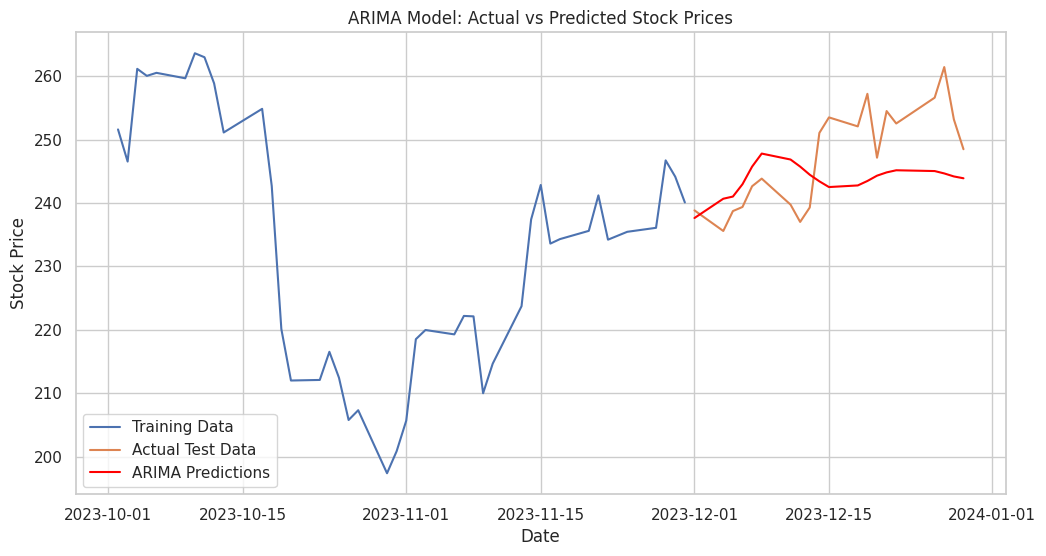

In [59]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/drive/MyDrive/Datasets/Sentiment_Analysis/filtered_prices_and_sentiments.csv')
data['PublishedAt'] = pd.to_datetime(data['PublishedAt'])
data.set_index('PublishedAt', inplace=True)

# Split the data
train_data = data[:'2023-11-30']
test_data = data['2023-12-01':]

# Fit ARIMA model
# We'll use ARIMA(5,1,5) as an example, but you might want to try different parameters
model = ARIMA(train_data['adjusted_close_price'], order=(5,1,5))
results = model.fit()

# Make predictions
# The steps argument should be equal to the length of the test data
predictions = results.forecast(steps=len(test_data))

# Calculate error metrics
mse = mean_squared_error(test_data['adjusted_close_price'], predictions)
mae = mean_absolute_error(test_data['adjusted_close_price'], predictions)

print("ARIMA Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(train_data.index, train_data['adjusted_close_price'], label='Training Data')
plt.plot(test_data.index, test_data['adjusted_close_price'], label='Actual Test Data')
plt.plot(test_data.index, predictions, label='ARIMA Predictions', color='red') # Use test_data.index for plotting predictions
plt.title('ARIMA Model: Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()



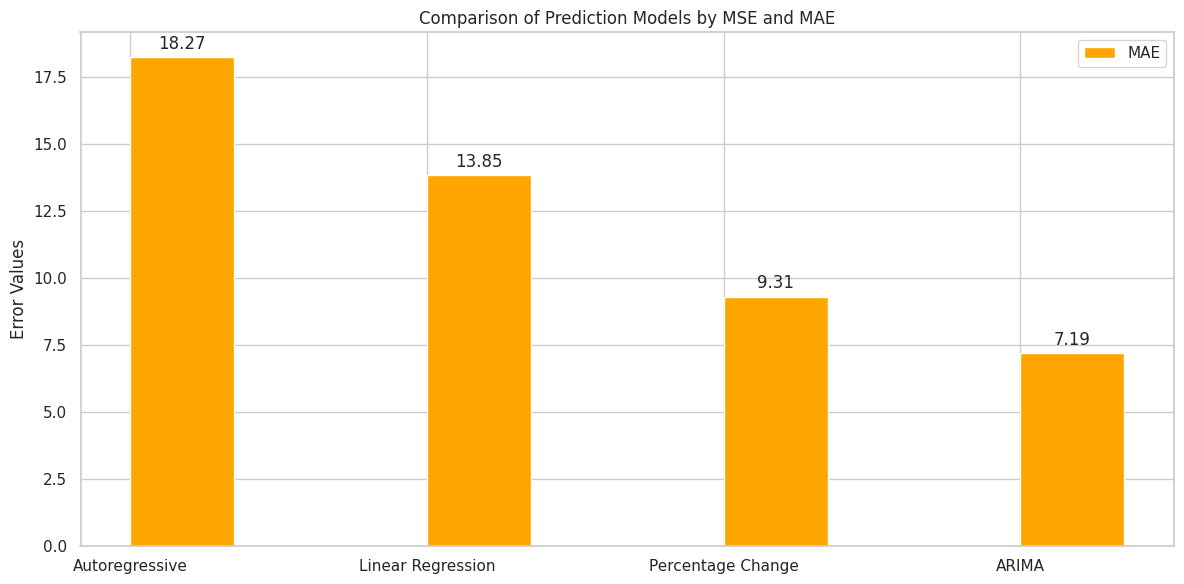

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Performance metrics
models = ['Autoregressive', 'Linear Regression', 'Percentage Change', 'ARIMA']
mse_values = [466.45, 275.47, 129.67, 67.64]
mae_values = [18.27, 13.85, 9.31, 7.19]

# Create a bar plot for MSE and MAE
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(models))
width = 0.35

# # Plot MSE
# mse_bars = ax.bar(x - width/2, mse_values, width, label='MSE', color='lightblue')

# Plot MAE
mae_bars = ax.bar(x + width/2, mae_values, width, label='MAE', color='orange')

# Customize the plot
ax.set_ylabel('Error Values')
ax.set_title('Comparison of Prediction Models by MSE and MAE')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add value labels on the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# add_labels(mse_bars)
add_labels(mae_bars)

# Adjust layout and display
plt.tight_layout()
plt.show()


# Conclusion

- ARIMA model outperformed other approaches in predicting Tesla stock prices, with the lowest Mean Squared Error (67.64) and Mean Absolute Error (7.19).
- Correlation analysis between sentiment scores and stock prices:
  - Calculated Pearson correlation coefficient between adjusted close price and Overall Sentiment
  - Found a weak positive correlation of 0.22 between sentiment and stock price
  - This suggests a slight tendency for stock prices to move in the same direction as sentiment, but the relationship is not strong
- Integration of sentiment scores with time series models (particularly ARIMA) yielded better results than using historical price data alone, indicating sentiment does play a role in stock price fluctuations, albeit a limited one.
